# ANOVA Test

## Problem 1 - Use 5% as a significance level
In the last decade, stockbrokers have drastically changed the way they do business. Internet trading has become quite common and online trades can cost as little as $7. It is now easier and cheaper to invest in the stock market than ever before. What are the effects of these changes? To help answer this question, a financial analyst randomly sampled 366 American households and asked each to report the age of the head of the household and the proportion of their financial assets that are invested in the stock market. The age categories are:

Young (under 35)
Early middle age (35 to 40)
Late middle age (50 to 65)
Senior (over 65)

The analyst was particularly interested in determining whether the ownership of stocks varied by age. Do these data allow the analyst to determine that there are differences in stock ownership between the four age groups? Check the required conditions.

In [41]:
PROC IMPORT DATAFILE='Total Assets Invested Stacked.xlsx'
	DBMS=XLSX
	OUT=WORK.IMPORT;
	GETNAMES=YES;
RUN;

data stacked;
	set work.import;
run;

proc print data=import (obs=5) noobs; run;

TotalAssets,AgeGroup
24.8,Young
35.5,Young
68.7,Young
42.2,Young
49.5,Young


### Analysis

In this analysis, we will look into the Total Assets Invested dataset that contains 366 records of both the age of the household head and the proportion of their financial assets that are invested in the stock market. age was distributed into 4 main categories:

Young (under 35)
Early middle age (35 to 40)
Late middle age (50 to 65)
Senior (over 65)

This Analysis aims to determine whether stock ownership varied by age and to answer that question the following hypothesis was tested at a 95% significance level.

H0: μ Young = μ Early Middle Age = μ Late Middle Age = μ Senior

Ha: Not all means are equal

First, the normal probability plot showed that the data was distributed fairly in a straight line which meant it is normally distributed with a mean of 50.2, a Standard deviation of 21.3, and a variance of 453.7


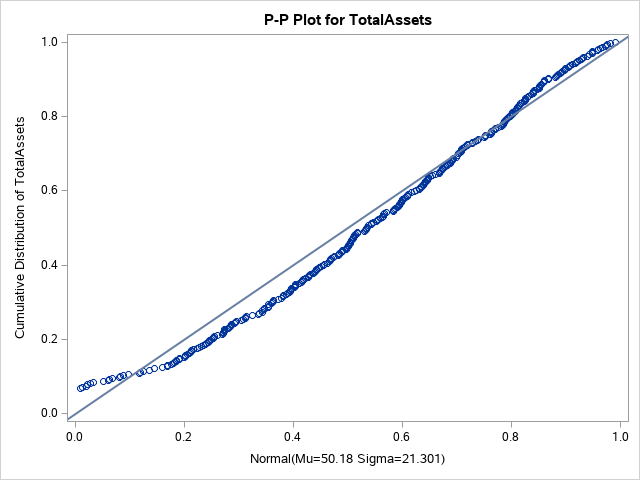

In [42]:
proc univariate
	data=stacked;
	ppplot TotalAssets;
run;


Second, an ANOVA test was conducted on the dataset and the following tables were generated.

In [44]:
ods graphics off;
proc glm
	data=stacked;
	class AgeGroup;
	model TotalAssets = AgeGroup;
	means AgeGroup/ tukey;
	lsmeans AgeGroup/ adjust=tukey;
run;

## Problem 2

One measure of the health of a national economy is how quickly it creates jobs. One aspect of
this issue is the number of jobs individuals hold. As part of a study on job tenure, a survey was
conducted wherein Americans aged between 17 and 45 were asked how many jobs they have
held in their lifetimes. Also recorded were gender and educational attainment. The categories
are:

Less than high school (E1)
High school (E2)
Some college/university but not degree (E3)
At least one university (E4)

a. Test to determine whether there is an interaction between gender and education in holding
jobs.

b. Test to determine whether there are differences in holding jobs between men and women.

c. Test to determine whether there are differences in holding jobs between the educational
levels.

In [45]:
PROC IMPORT DATAFILE='Lifetime_of_Jobs_by_Educational_Level_stacked.xlsx'
	DBMS=XLSX
	OUT=WORK.IMPORT_1;
	GETNAMES=YES;
RUN;


data stacked_1;
	set work.import_1;
run;

proc print data=stacked_1 (obs=5) noobs; run;

Gender,Education,JobLifetime
Male,E1,10
Male,E1,9
Male,E1,12
Male,E1,16
Male,E1,14


## Problem 2

In this report, we will be analyzing the Lifetime of Jobs by Educational level dataset. It contains 80 records of the Gender, Educational level, and the number of jobs held in the participant's lifetime, the report aims to answer three questions.
Is there an interaction between gender and education in holding jobs?

H0: An interaction is absent

Ha: An interaction is present

Are there any differences in holding jobs between men and women?

H0: μ Men = μ Women

Ha: μ Men ≠ μ Women

Are there any differences in holding jobs between the educational levels?

H0: μ E1 = μ E2 = μ E3 = μ E4

Ha: Not all means are equal

First, we used the P-P plot to determine if the data is normally distributed and the plot showed that the data followed the theoretical normal distribution straight line fairly which means we can assume a normal distribution.



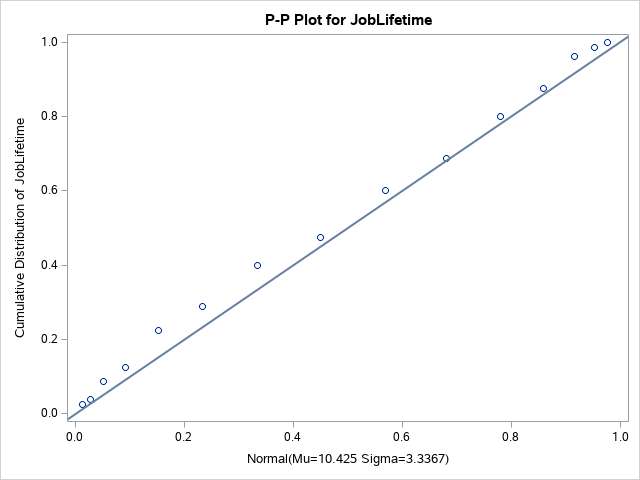

In [47]:
proc univariate
	data=stacked_1;
	ppplot JobLifetime;
run;

The means of both genders are close to each other as well as the standard deviation.

For the Education level on the other hand it is clear that there are some differences between the means and at least E3 has a higher standard deviation than the rest of the education levels.

To further analyze these findings we need to conduct an ANOVA test, and the test generated the following results, the model had 7 degrees of freedom and the Error had 72 degrees of freedom.

For the first question, the P value is 0.8915 which is higher than α (0.05) therefore we fail to reject the null hypothesis.

In the second question, the P value is 0.2944 which is also higher than α (0.05) therefore we fail to reject the null hypothesis.

For both previous variables, there is no statistical difference between the two genders or if there is statistical evidence of an interaction between the variables.

As for the last question, the P value is 0.0060 which is lower than α (0.05) therefore we reject the null hypothesis and decide that there is a statistical difference between education levels in terms of jobs held in a lifetime.



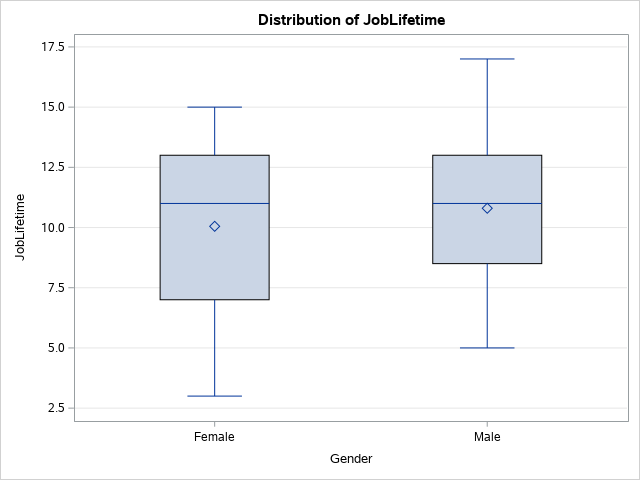
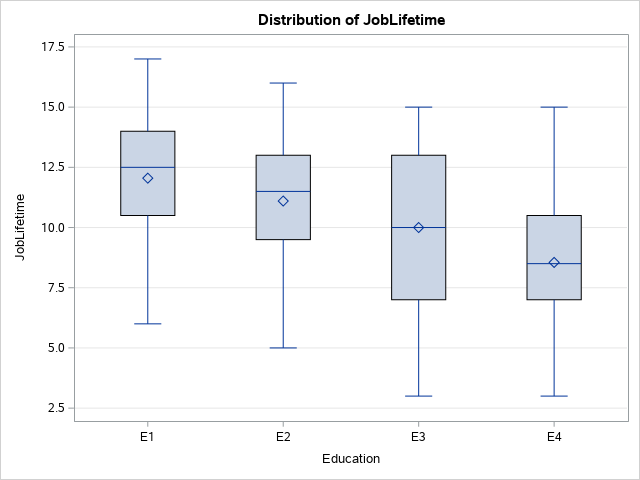

In [48]:
proc anova
	data=stacked_1;
	class Gender Education;
	model JobLifetime = Gender Education Gender*Education;
	means Gender Education;
run;


After rejecting the null hypothesis, a deeper analysis of Education levels was neededd to determine which levels had unequal means to the others, thus we used the Tukey method.

E1 and E4 were grouped in different groups while E2 and E3 once were grouped with E1 in group A and E4 in group B. This means that E1 and E4 have different means. And that difference is shown in the Tukey test where the P value was 0.0038 which is less than α (0.05) and we reject the null hypothesis

H0: μ E1 = μ E4

Ha: μ E1 ≠ μ E4

This means that the mean of jobs held in a lifetime in Education level 4 is different from the mean of other education levels.

In [49]:
ods graphics off;
proc glm
	data=stacked_1;
	class Education;
	model JobLifetime = Education;
	means Education/ tukey;
	lsmeans Education/ adjust= tukey;
run;